In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plts
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
# import mysql.connector as sql
import sqlite3

from sqlalchemy import create_engine

In [85]:
data_transactions = pd.read_csv('./Data/transactions.csv')
data_transactions.head(3)



,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe


In [86]:
data_transactions.shape

(500000, 7)

In [87]:
data_transactions.isnull().sum()

tran_id                0
cust_id                0
tran_date              0
tran_amount            0
platform            4941
product_category       0
payment_type           0
dtype: int64

In [88]:
data_transactions.platform.value_counts(dropna=False)

Amazon      151443
Flipkart    122660
Alibaba      73584
Meesho       73271
Shopify      39416
Cred         24741
Ebay          9944
NaN           4941
Name: platform, dtype: int64

In [89]:
missingData = data_transactions[data_transactions.platform.isnull()]
missingData.head(3)

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
355,356,58,2023-01-01,237,NaN,Electronics,Net Banking
418,419,383,2023-01-01,338,NaN,Electronics,Credit Card
607,608,421,2023-01-01,700,NaN,Electronics,Phonepe


In [90]:
missingData.product_category.value_counts(dropna=False)

Electronics               1297
Fashion & Apparel         1159
Beauty & Personal Care     572
Kitchen Appliances         564
Sports                     484
Home Decor                 405
Garden & Outdoor           242
Books                      121
Toys & Games                97
Name: product_category, dtype: int64

In [91]:
# pd.set_option('display.max_rows', None)

In [92]:
pd.DataFrame(data_transactions.groupby(['platform','product_category'])['product_category'].count())

product_category
platform product_category                        
Alibaba  Beauty & Personal Care              8475
         Books                               2041
         Electronics                        19207
         Fashion & Apparel                  17173
         Garden & Outdoor                    3511
         Home Decor                          5796
         Kitchen Appliances                  8603
         Sports                              7346
         Toys & Games                        1432
Amazon   Beauty & Personal Care             16581
         Books                               4054
         Electronics                        43486
         Fashion & Apparel                  34752
         Garden & Outdoor                    7012
         Home Decor                         11092
         Kitchen Appliances                 16749
         Sports                             14761
         Toys & Games                        2956
Cred     Beauty & Personal Care              2784
         Books                                648
         Electronics                         6511
         Fashion & Apparel                   5808
         Garden & Outdoor                    1189
         Home Decor                          1920
         Kitchen Appliances                  2913
         Sports                              2508
         Toys & Games                         460
Ebay     Beauty & Personal Care              1152
         Books                                268
         Electronics                         2580
         Fashion & Apparel                   2375
         Garden & Outdoor                     475
         Home Decor                           751
         Kitchen Appliances                  1150
         Sports                               999
         Toys & Games                         194
Flipkart Beauty & Personal Care             14013
         Books                               3300
         Electronics                        31982
         Fashion & Apparel                  29140
         Garden & Outdoor                    5900
         Home Decor                          9500
         Kitchen Appliances                 14191
         Sports                             12234
         Toys & Games                        2400
Meesho   Beauty & Personal Care              8013
         Books                               2048
         Electronics                        19243
         Fashion & Apparel                  17232
         Garden & Outdoor                    3506
         Home Decor                          5750
         Kitchen Appliances                  8534
         Sports                              7424
         Toys & Games                        1521
Shopify  Beauty & Personal Care              4475
         Books                               1155
         Electronics                        10229
         Fashion & Apparel                   9253
         Garden & Outdoor                    1809
         Home Decor                          3141
         Kitchen Appliances                  4649
         Sports                              3948
         Toys & Games                         757

<AxesSubplot: xlabel='count', ylabel='product_category'>

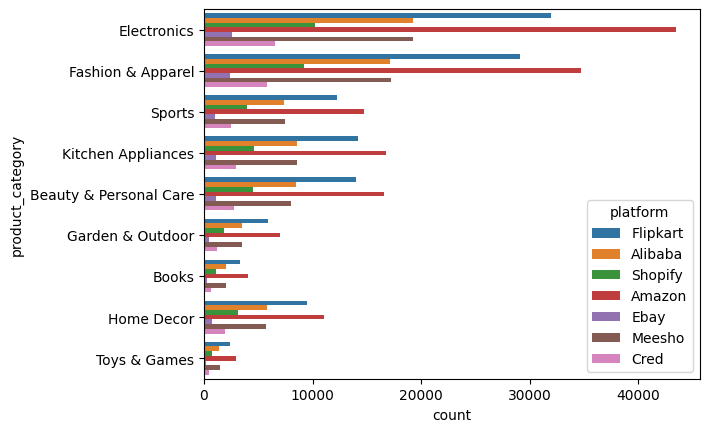

In [93]:
sns.countplot(y="product_category", hue='platform',data = data_transactions)


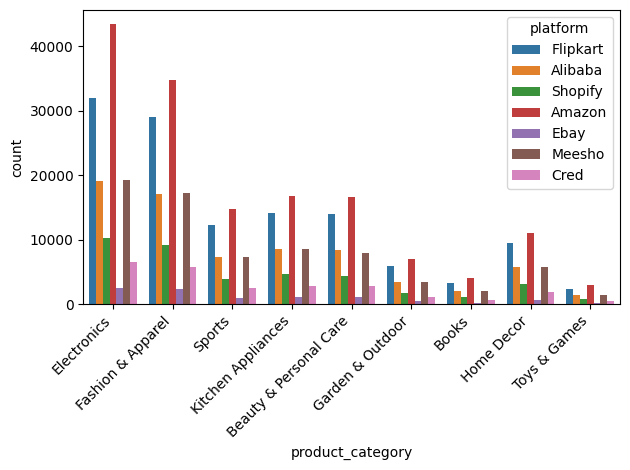

In [94]:
sns.countplot(x="product_category", hue='platform',data = data_transactions)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()


# Show the plot
plt.show()

##### Based on Business Knowledge Amazon is the most common platform

In [95]:
data_transactions.platform.mode()[0]

'Amazon'

In [96]:
data_transactions.platform.fillna(data_transactions.platform.mode()[0],inplace=True)

In [97]:
missingData = data_transactions[data_transactions.platform.isnull()]
missingData.head(3)

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type


In [98]:
data_transactions.isnull().sum()

tran_id             0
cust_id             0
tran_date           0
tran_amount         0
platform            0
product_category    0
payment_type        0
dtype: int64

In [102]:
data_transactions.describe()

,tran_id,cust_id,tran_amount
count,500000.000000,500000.000000,500000.00000
mean,250000.500000,501.400428,3225.20733
std,144337.711635,288.641924,13098.74276
min,1.000000,1.000000,0.00000
25%,125000.750000,252.000000,64.00000
50%,250000.500000,502.000000,141.00000
75%,375000.250000,752.000000,397.00000
max,500000.000000,1000.000000,69999.00000


##### We check Transaction date to make sure its in a Valid Date Format

In [104]:
data_transactions.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking


#### We can see there is a clear Outliar in tran_amount

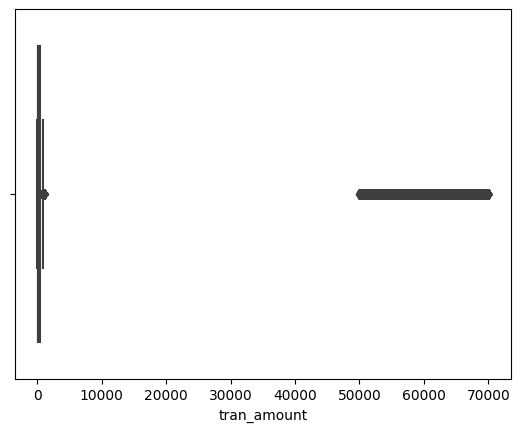

In [103]:
sns.boxplot(x=data_transactions.tran_amount)
plt.show()

In [107]:
stdTrans = data_transactions.tran_amount.std()
stdTrans

13098.74275954956

In [108]:
meanTrans = data_transactions.tran_amount.mean()
meanTrans

3225.20733

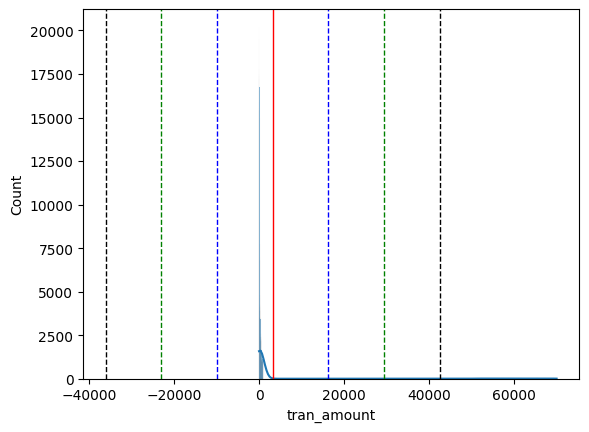

In [111]:
sns.histplot(data_transactions.tran_amount, kde= True)
plt.axvline(meanTrans, color='r',linestyle = 'solid',linewidth =1)


plt.axvline(meanTrans + stdTrans, color='b',linestyle = 'dashed', linewidth =1)
plt.axvline(meanTrans - stdTrans, color='b',linestyle = 'dashed', linewidth =1)


plt.axvline(meanTrans + 2* stdTrans, color='g',linestyle = 'dashed', linewidth =1)
plt.axvline(meanTrans - 2* stdTrans, color='g',linestyle = 'dashed', linewidth =1)



plt.axvline(meanTrans + 3* stdTrans, color='black',linestyle = 'dashed', linewidth =1)
plt.axvline(meanTrans - 3* stdTrans, color='black',linestyle = 'dashed', linewidth =1)


